# Introduction

## Setup

First, check if you are at the correct project environment. The project file loaded should be `ExperimentalDesign/examples/Project.toml`:

In [1]:
using Pkg
Pkg.status()

Status `~/.julia/dev/ExperimentalDesign/examples/Project.toml`
  [a93c6f00] DataFrames v0.21.4
  [864edb3b] DataStructures v0.17.19
  [31c24e10] Distributions v0.23.4
  [ffbed154] DocStringExtensions v0.8.2
  [e30172f5] Documenter v0.24.11
  [4babbea4] ExperimentalDesign v0.3.0
  [38e38edf] GLM v1.3.9
  [91a5bcdd] Plots v1.5.3
  [27ebfcd6] Primes v0.5.0
  [2913bbd2] StatsBase v0.33.0
  [3eaba693] StatsModels v0.6.11
  [f3b207a7] StatsPlots v0.14.6
  [37e2e46d] LinearAlgebra 
  [56ddb016] Logging 
  [9a3f8284] Random 
  [8dfed614] Test 


Then check if all packages are installed and up to date:

In [2]:
Pkg.update()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/dev/ExperimentalDesign/Project.toml`
 [no changes]
  Updating `~/.julia/dev/ExperimentalDesign/Manifest.toml`
 [no changes]


In [2]:
using ExperimentalDesign, StatsModels, GLM, DataFrames, Distributions, Random, StatsPlots

┌ Info: Precompiling ExperimentalDesign [4babbea4-9e7d-11e9-116f-e1ada04bd296]
└ @ Base loading.jl:1260
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1260


# Generating Random Designs



In [8]:
design_distribution = DesignDistribution((f1 = Uniform(0, 1),
        f2 = Uniform(0, 1)))

DesignDistribution
Formula: 0 ~ f1 + f2
Factor Distributions:
f1: Uniform{Float64}(a=0.0, b=1.0)
f2: Uniform{Float64}(a=0.0, b=1.0)

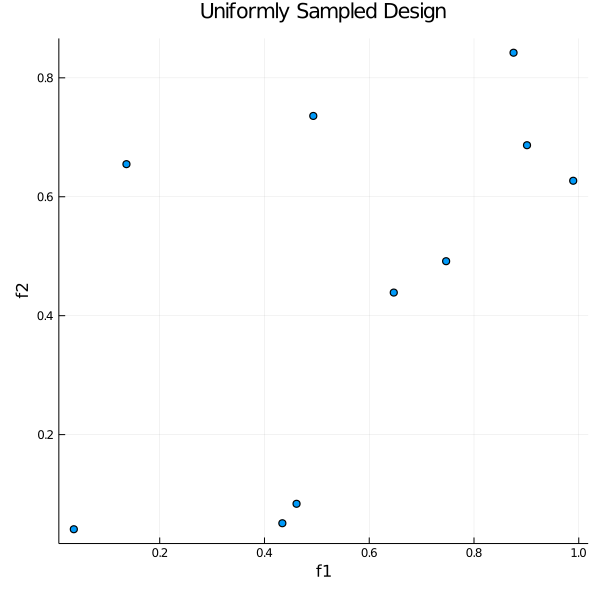

In [36]:
design = rand(design_distribution, 10)
@df design.matrix scatter(:f1,
    :f2,
    size = (600, 600),
    xlabel = "f1",
    ylabel = "f2",
    legend = false,
    title = "Uniformly Sampled Design")

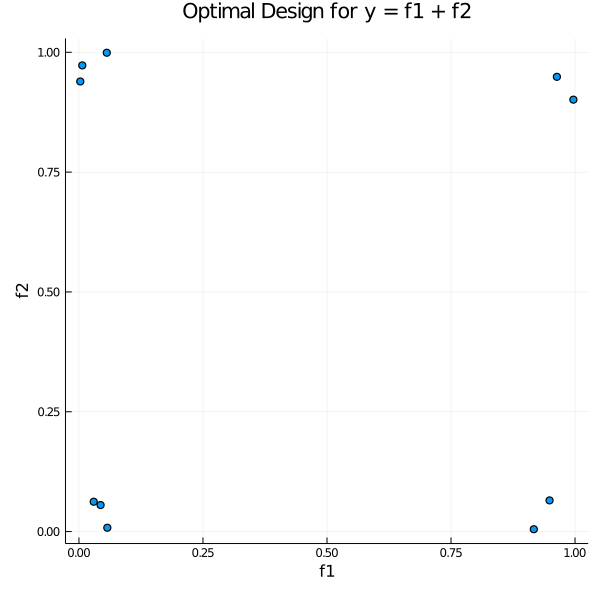

In [37]:
design = rand(design_distribution, 400);
f = @formula 0 ~ f1 + f2
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:f1,
    :f2,
    size = (600, 600),
    xlabel = "f1",
    ylabel = "f2",
    legend = false,
    title = "Optimal Design for y = f1 + f2")

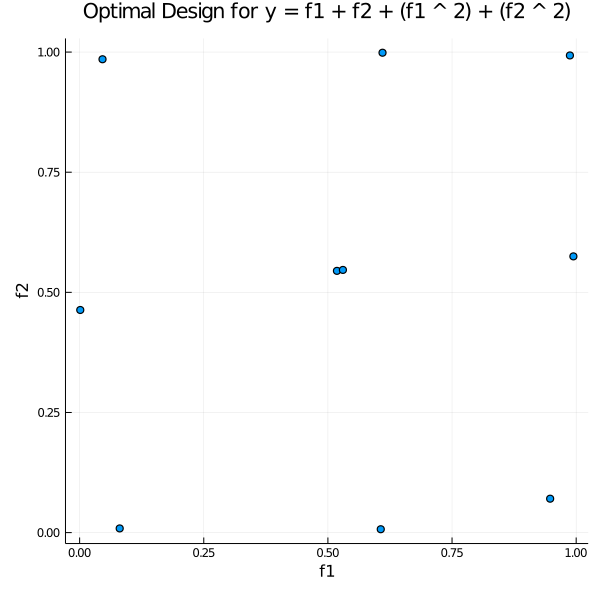

In [38]:
design = rand(design_distribution, 400);
f = @formula 0 ~ f1 + f2 + f1 ^ 2 + f2 ^ 2
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:f1,
    :f2,
    size = (600, 600),
    xlabel = "f1",
    ylabel = "f2",
    legend = false,
    title = "Optimal Design for y = f1 + f2 + (f1 ^ 2) + (f2 ^ 2)")

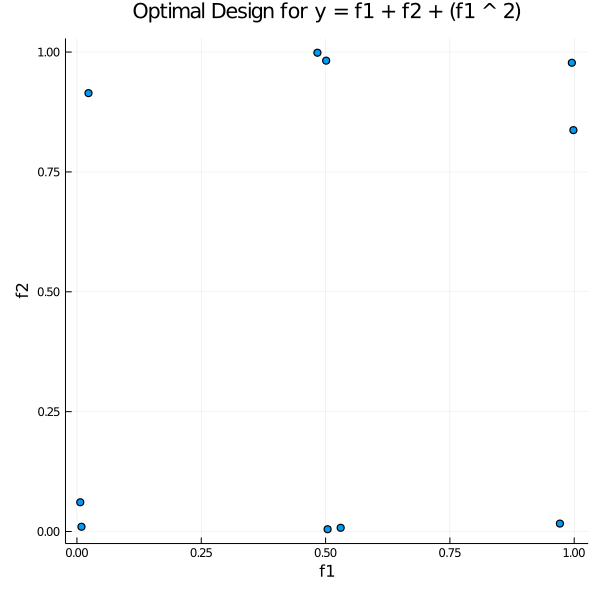

In [46]:
design = rand(design_distribution, 800);
f = @formula 0 ~ f1 + f2 + f1 ^ 2
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:f1,
    :f2,
    size = (600, 600),
    xlabel = "f1",
    ylabel = "f2",
    legend = false,
    title = "Optimal Design for y = f1 + f2 + (f1 ^ 2)")

In [48]:
design_distribution = DesignDistribution((f1 = DiscreteUniform(0, 5),
        f2 = Uniform(0, 1)))

DesignDistribution
Formula: 0 ~ f1 + f2
Factor Distributions:
f1: DiscreteUniform(a=0, b=5)
f2: Uniform{Float64}(a=0.0, b=1.0)

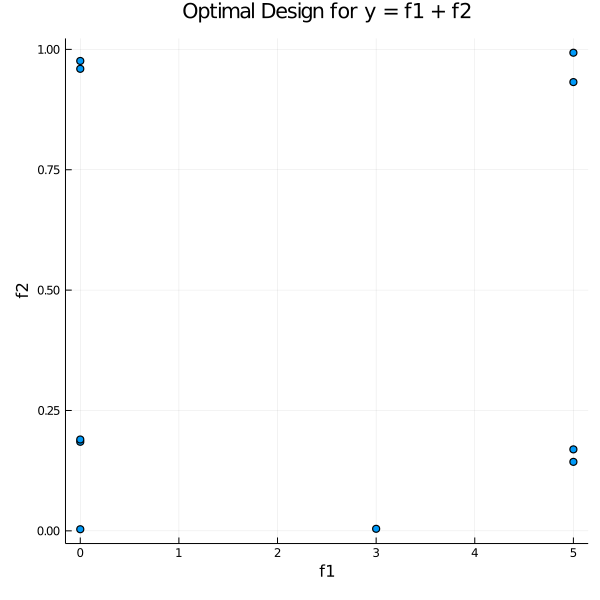

In [58]:
design = rand(design_distribution, 400);
f = @formula 0 ~ f1 + f2 + log(f2)
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:f1,
    :f2,
    size = (600, 600),
    xlabel = "f1",
    ylabel = "f2",
    legend = false,
    title = "Optimal Design for y = f1 + f2")